In [39]:
!pip install librosa
!pip install matplotlib
!pip install ipython

In [40]:
import librosa
audio_path = './sample_audio.wav'
x , sr = librosa.load(audio_path,sr=44100)
print(type(x), type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [41]:
sr

44100

In [42]:
x, x.size

(array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 107957)

In [43]:

import IPython.display as ipd
ipd.Audio(audio_path)

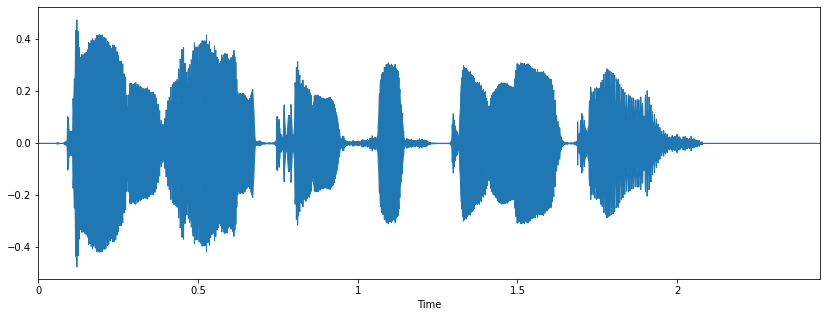

In [44]:
#display waveform

import matplotlib.pyplot as plt
import librosa.display
%matplotlib inline

plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr)

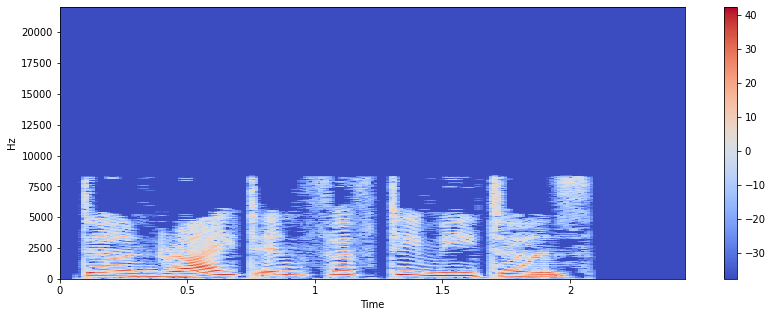

In [45]:
#display Spectrogram
# stft : Short time FT
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 

plt.colorbar()

2


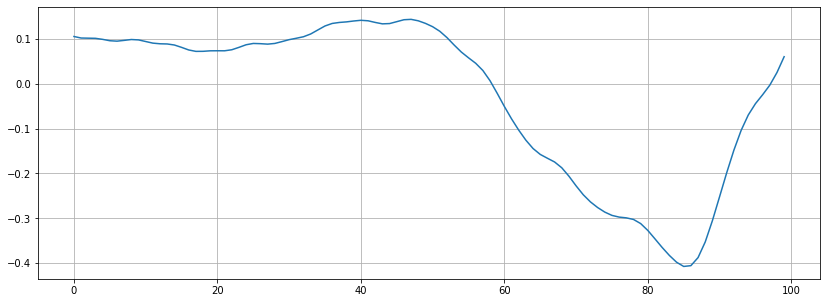

In [46]:
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

# Zero crossing
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

In [47]:
# #spectral centroid -- centre of mass -- weighted mean of the frequencies present in the sound
# import sklearn
# spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
# spectral_centroids.shape

# # Computing the time variable for visualization
# frames = range(len(spectral_centroids))
# t = librosa.frames_to_time(frames)

# # Normalising the spectral centroid for visualisation
# def normalize(x, axis=0):
#     return sklearn.preprocessing.minmax_scale(x, axis=axis)

# #Plotting the Spectral Centroid along the waveform
# # plt.figure(figsize=(14, 5))
# librosa.display.waveplot(x, sr=sr, alpha=0.4)
# plt.plot(t, normalize(spectral_centroids), color='r')

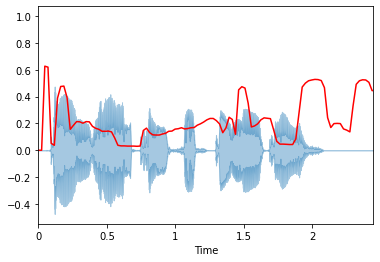

In [48]:
spectral_rolloff = librosa.feature.spectral_rolloff(x, sr=sr)[0]
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

(20, 211)


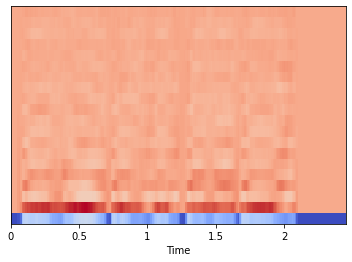

In [49]:
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)
#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')